<a href="https://colab.research.google.com/github/someshkr/Geo-Copula/blob/main/earthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopy
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.2 MB/s 
     |████████████████████████████████| 16.7 MB 467 kB/s 
     |████████████████████████████████| 6.3 MB 33.2 MB/s 


In [2]:
import tensorflow as tf
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import math
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense

In [3]:
df = pd.read_excel("/content/query.xlsx")
# df = pd.read_csv("/dbfs/FileStore/data/Indian_earthquake_data.csv")
df['time'] = pd.to_datetime(df['time'],utc=True)
df = df[['time','latitude','longitude','depth','mag']]
df = df.sort_values(by='time',ascending=True)
df.head()

,time,latitude,longitude,depth,mag
17836,2000-09-17 05:18:04.270000+00:00,38.006,140.670,105.1,4.5
17835,2000-09-17 21:04:24.900000+00:00,30.257,138.392,445.6,4.3
17834,2000-09-21 22:43:24.770000+00:00,35.811,140.837,45.2,4.8
17833,2000-09-23 17:42:10.600000+00:00,41.444,142.217,63.9,4.3
17832,2000-09-25 16:22:01.020000+00:00,32.167,142.461,33.0,4.1


In [4]:
df_train = df.iloc[:12512]
df_val = df.iloc[12512:14271]
df_test = df.iloc[14271:]
df_train = df_train.set_index('time')
df_val = df_val.set_index('time')
df_test = df_test.set_index('time')

In [5]:
x_train,y_train= df_train[['latitude','longitude','depth']],df_train[['mag']]
x_test,y_test= df_test[['latitude','longitude','depth']],df_test[['mag']]
x_val,y_val  = df_val[['latitude','longitude','depth']],df_val[['mag']]

In [6]:
batch_size = 32
buffer_size = x_train.shape[0]
# Provide an infinite dataset
x_train = np.array(x_train)
x_test = np.array(x_test)
x_val = np.array(x_val)

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
x_val = x_val.reshape((x_val.shape[0], x_val.shape[1], 1))
train_iterator = tf.data.Dataset.from_tensor_slices((np.array(x_train), np.array(y_train))).shuffle(buffer_size).batch(batch_size).repeat()
# Provide an infinite dataset
val_iterator = tf.data.Dataset.from_tensor_slices((np.array(x_val), np.array(y_val))).batch(batch_size).repeat()
test_iterator = tf.data.Dataset.from_tensor_slices((np.array(x_test), np.array(y_test))).batch(batch_size).repeat()

In [7]:
n_steps = x_train.shape[-2]
n_features = x_train.shape[-1]
# Define the model
model = Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
#model.add(tf.keras.layers.Reshape((128, 1), input_shape = (128, )))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [8]:
n_steps,n_features

(3, 1)

In [9]:
# train_iterator
# X = X.reshape((X.shape[0], X.shape[1], n_features))

In [10]:
epochs = 10
steps_per_epoch = 800
validation_steps = 80
# Train with an infinite dataset
history = model.fit(train_iterator, epochs=epochs,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_iterator,
                    validation_steps=validation_steps)
print('=======================')
model.summary()

Epoch 1/10
800/800 [==============================] - 21s 15ms/step - loss: 0.6174 - val_loss: 0.1436
Epoch 2/10
800/800 [==============================] - 6s 8ms/step - loss: 0.2314 - val_loss: 0.1428
Epoch 3/10
800/800 [==============================] - 4s 5ms/step - loss: 0.2328 - val_loss: 0.1509
Epoch 4/10
800/800 [==============================] - 4s 6ms/step - loss: 0.2311 - val_loss: 0.1448
Epoch 5/10
800/800 [==============================] - 4s 5ms/step - loss: 0.2336 - val_loss: 0.1352
Epoch 6/10
800/800 [==============================] - 4s 5ms/step - loss: 0.2328 - val_loss: 0.1452
Epoch 7/10
800/800 [==============================] - 5s 6ms/step - loss: 0.2308 - val_loss: 0.1496
Epoch 8/10
800/800 [==============================] - 4s 5ms/step - loss: 0.2331 - val_loss: 0.1417
Epoch 9/10
800/800 [==============================] - 4s 6ms/step - loss: 0.2313 - val_loss: 0.1551
Epoch 10/10
800/800 [==============================] - 5s 6ms/step - loss: 0.2328 - val_loss: 0.14

In [11]:
# epochs = 10
# steps_per_epoch = 800
# validation_steps = 80
# # Train with an infinite dataset
# x_train = np.array(x_train)
# x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
# history = model.fit(x_train, y_train,epochs=epochs,
#                     steps_per_epoch=steps_per_epoch
#                    )
# print('=======================')
# model.summary()

In [12]:

#for batch_num, (x, y) in enumerate(test_iterator.take(3)):
  
len(model.predict(np.array(x_test)).reshape(-1))

3566

In [13]:

# yhat = model.predict(np.array(x_test), verbose=0).reshape(-1)


In [14]:
x_test.shape

(3566, 3, 1)

In [15]:
df_final = df_test.copy()
df_final['yhat']=model.predict(np.array(x_test)).reshape(-1)

In [16]:
df_final.head()

,latitude,longitude,depth,mag,yhat
time,,,,,
2016-10-20 02:49:53.120000+00:00,35.8196,140.5082,18.91,5.3,4.601982
2016-10-20 19:07:26.450000+00:00,41.9161,140.8357,154.05,4.2,4.244403
2016-10-21 05:07:22.990000+00:00,35.3743,133.8092,5.63,6.2,4.448021
2016-10-21 05:30:07.340000+00:00,35.5001,133.5914,10.00,4.1,4.448863
2016-10-21 05:33:58.790000+00:00,35.3563,133.8545,10.00,4.0,4.445379


In [17]:
# # univariate lstm example
# from numpy import array
# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import Dense
 
# # split a univariate sequence into samples
# def split_sequence(sequence, n_steps):
# 	X, y = list(), list()
# 	for i in range(len(sequence)):
# 		# find the end of this pattern
# 		end_ix = i + n_steps
# 		# check if we are beyond the sequence
# 		if end_ix > len(sequence)-1:
# 			break
# 		# gather input and output parts of the pattern
# 		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    
# 		X.append(seq_x)
# 		y.append(seq_y)
# 	return array(X), array(y)
 
# # define input sequence
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# # choose a number of time steps
# n_steps = 3
# # split into samples
# X, y = split_sequence(raw_seq, n_steps)

# # reshape from [samples, timesteps] into [samples, timesteps, features]
# n_features = 1
# print('++++++++++++++++++++++++++++++++++++++++++++++++')
# print(X.shape)
# X = X.reshape((X.shape[0], X.shape[1], n_features))
# print(X.ndim)
# # define model
# model = Sequential()
# model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')
# # fit model
# model.fit(X, y, epochs=200, verbose=0)
# # demonstrate prediction
# x_input = array([70, 80, 90])
# x_input = x_input.reshape((1, n_steps, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

In [18]:
from sklearn.cluster import AgglomerativeClustering

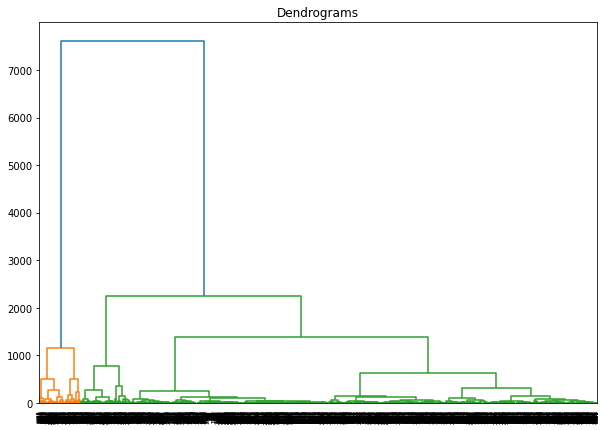

In [21]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
df_dend = df_final.drop(['mag'],axis=1) 
dend = shc.dendrogram(shc.linkage(df_dend, method='ward'))

In [24]:
cluster = AgglomerativeClustering(n_clusters=4).fit(df_dend)
df_dend['labels'] = cluster.labels_